<a href="https://colab.research.google.com/github/MONIKA-N29/Neural_Network_Dataset_Processing/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enable GPU in Colab


In [11]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


Install Kaggle API


In [12]:
!pip install kaggle


Upload your Kaggle API token


In [13]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"monika2907","key":"015b79cdb9fb8d388f74ab5f514c6a96"}'}

In [18]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Download the Intel Image Classification dataset


In [19]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip -q intel-image-classification.zip -d intel_data


Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 97% 337M/346M [00:00<00:00, 645MB/s]
100% 346M/346M [00:00<00:00, 684MB/s]


Verify dataset structure


In [20]:
import os

train_path = "intel_data/seg_train/seg_train"
test_path = "intel_data/seg_test/seg_test"

print("Train classes:", os.listdir(train_path))
print("Number of training images in 'buildings':", len(os.listdir(os.path.join(train_path, "buildings"))))


Train classes: ['forest', 'sea', 'buildings', 'mountain', 'glacier', 'street']
Number of training images in 'buildings': 2191


Preprocessing the Dataset


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (150,150)
batch_size = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    "intel_data/seg_train/seg_train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_ds = val_gen.flow_from_directory(
    "intel_data/seg_test/seg_test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

class_names = list(train_ds.class_indices.keys())
print("Classes:", class_names)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


Images

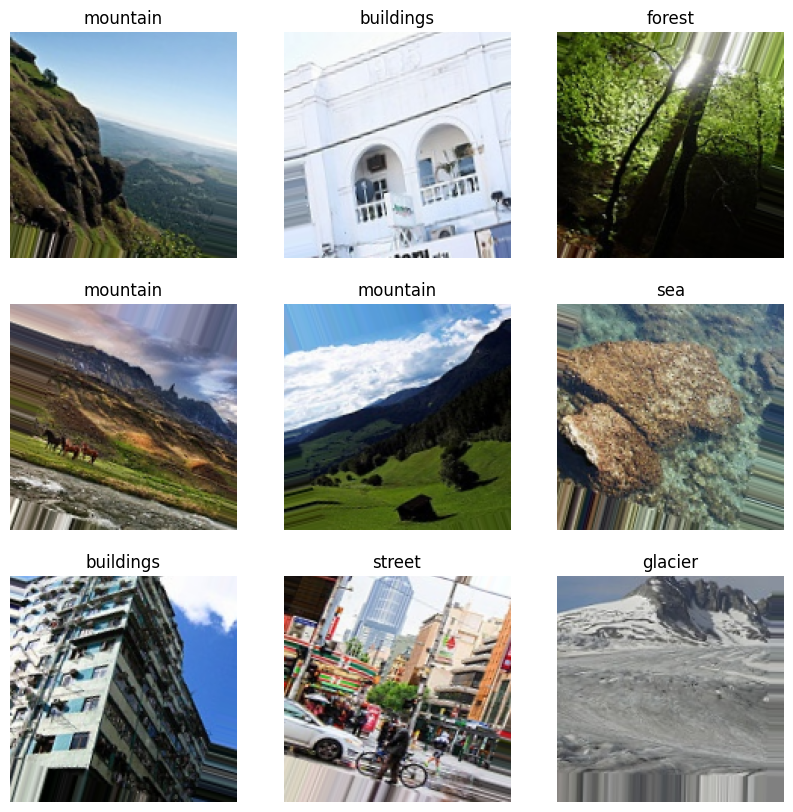

In [22]:
import matplotlib.pyplot as plt
import numpy as np
images, labels = next(train_ds)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")
plt.show()


ARCHITECTURE 1 BUILDING

In [23]:
from tensorflow.keras import layers, models

num_classes = len(class_names)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # because labels are integers
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',   # changed here
    metrics=['accuracy']
)


Training Model

In [26]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 93s 198ms/step - accuracy: 0.4755 - loss: 1.3307 - val_accuracy: 0.6450 - val_loss: 0.9417
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 83s 188ms/step - accuracy: 0.6548 - loss: 0.9257 - val_accuracy: 0.7273 - val_loss: 0.7483
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 83s 188ms/step - accuracy: 0.7050 - loss: 0.8078 - val_accuracy: 0.7430 - val_loss: 0.6929
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 186ms/step - accuracy: 0.7412 - loss: 0.7361 - val_accuracy: 0.7887 - val_loss: 0.5980
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 81s 184ms/step - accuracy: 0.7652 - loss: 0.6650 - val_accuracy: 0.8137 - val_loss: 0.5018
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 186ms/step - accuracy: 0.7781 - loss: 0.6303 - val_accuracy: 0.8033 - val_loss: 0.5496
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 186ms/step - accuracy: 0.7798 - loss: 0.6142 - val_accuracy: 0.8127 - val_loss: 0.5459
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 84s 191ms/step - accuracy: 0.7839 - loss: 0

In [27]:
loss, acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {acc*100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8379 - loss: 0.4663
Validation Accuracy: 83.80%


Plotting Curves

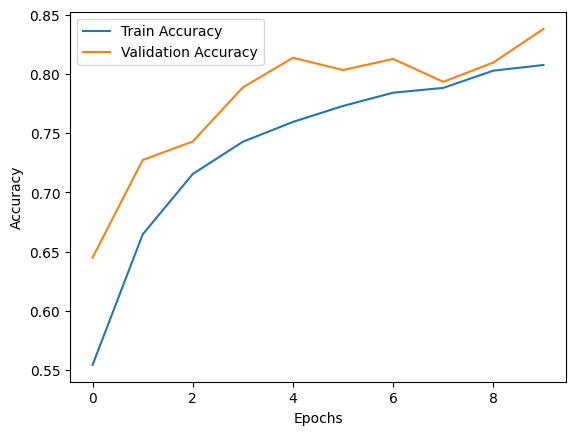

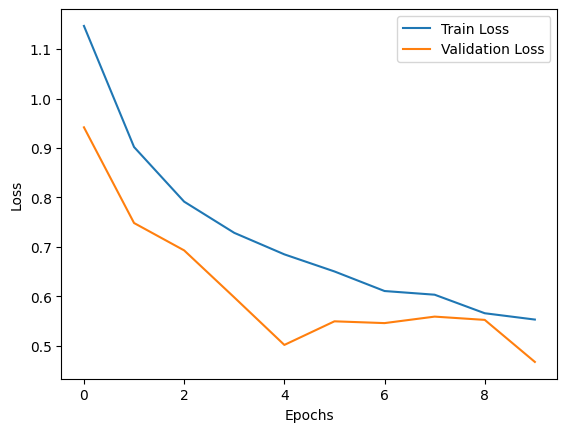

In [28]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


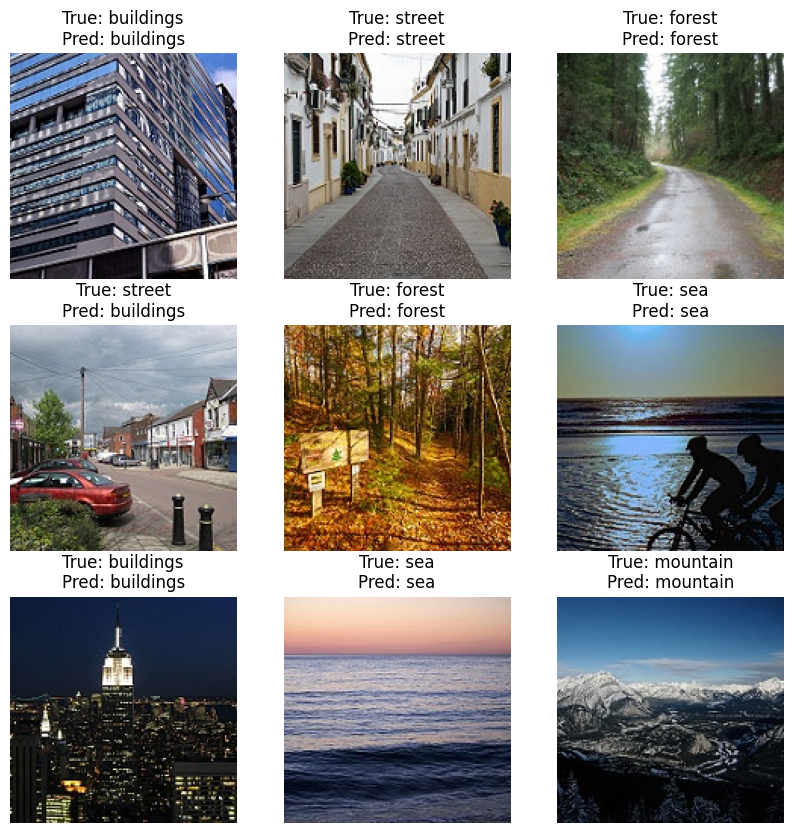

In [30]:
import numpy as np
images, labels = next(iter(val_ds))
preds = model.predict(images)
pred_classes = np.argmax(preds, axis=1)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    true_label = class_names[np.argmax(labels[i])]   # labels are one-hot
    pred_label = class_names[pred_classes[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis("off")


ARCHITECTURE 2


In [31]:
from tensorflow.keras import layers, models

num_classes = len(class_names)

model2 = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Block 2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Block 3
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Block 4
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Global Pooling
    layers.GlobalAveragePooling2D(),

    # Dense Layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457,670 (1.75 MB)

 Trainable params: 456,710 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

Training Model

In [32]:
history2 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 99s 206ms/step - accuracy: 0.5560 - loss: 1.1614 - val_accuracy: 0.2927 - val_loss: 2.6484
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 84s 192ms/step - accuracy: 0.7361 - loss: 0.7149 - val_accuracy: 0.6753 - val_loss: 1.0118
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 84s 191ms/step - accuracy: 0.7819 - loss: 0.6002 - val_accuracy: 0.7083 - val_loss: 0.8583
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 84s 191ms/step - accuracy: 0.8059 - loss: 0.5405 - val_accuracy: 0.4857 - val_loss: 2.0361
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 83s 189ms/step - accuracy: 0.8235 - loss: 0.5001 - val_accuracy: 0.6803 - val_loss: 0.8132
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 83s 190ms/step - accuracy: 0.8342 - loss: 0.4585 - val_accuracy: 0.7130 - val_loss: 0.7403
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 143s 193ms/step - accuracy: 0.8501 - loss: 0.4250 - val_accuracy: 0.7947 - val_loss: 0.5715
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 85s 195ms/step - accuracy: 0.8455 - loss: 

In [33]:
loss2, acc2 = model2.evaluate(val_ds)
print(f"Validation Accuracy (Architecture 2): {acc2*100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7611 - loss: 0.7971
Validation Accuracy (Architecture 2): 75.57%


Plotting Curves

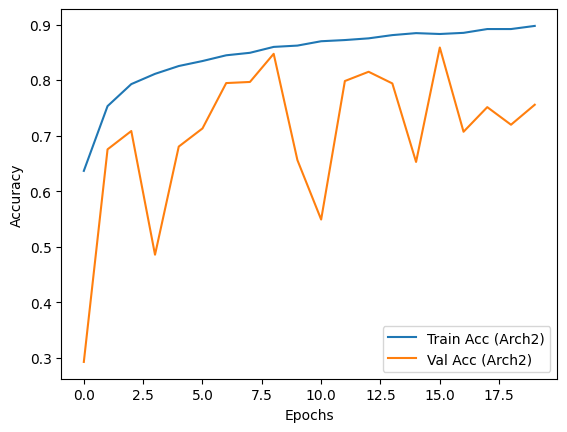

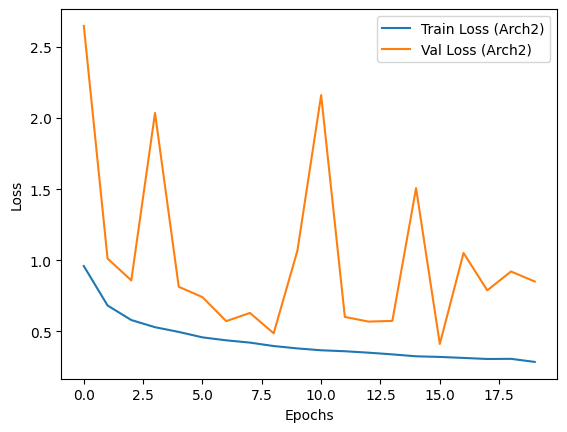

In [34]:
# Accuracy
plt.plot(history2.history['accuracy'], label='Train Acc (Arch2)')
plt.plot(history2.history['val_accuracy'], label='Val Acc (Arch2)')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(history2.history['loss'], label='Train Loss (Arch2)')
plt.plot(history2.history['val_loss'], label='Val Loss (Arch2)')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


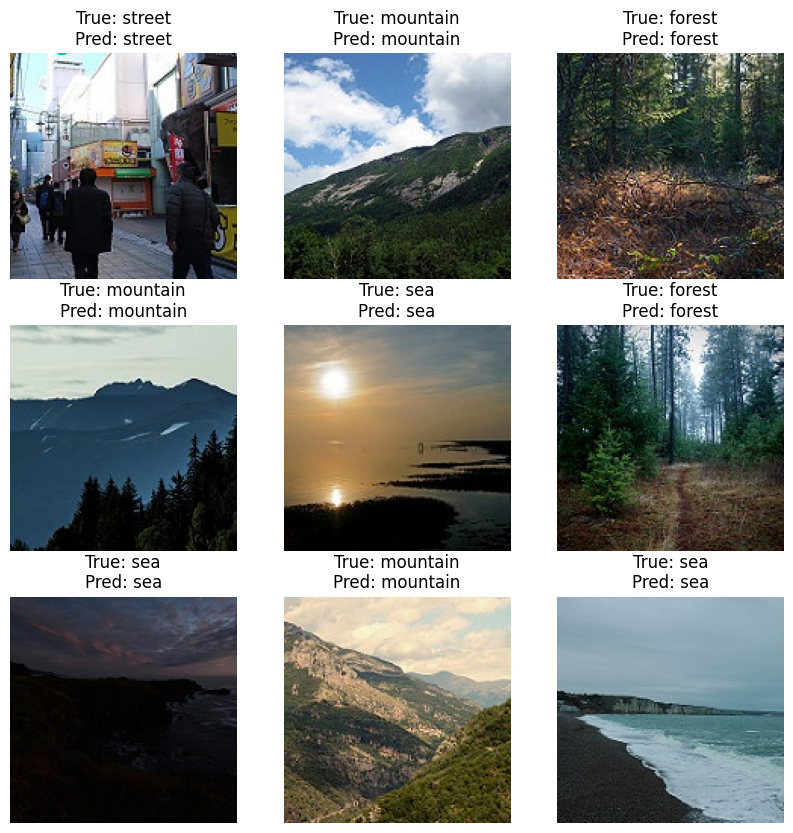

In [36]:
import numpy as np
import matplotlib.pyplot as plt


images, labels = next(iter(val_ds))

preds = model2.predict(images)
pred_classes = np.argmax(preds, axis=1)

# Plot first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    true_label = class_names[np.argmax(labels[i])]   # labels are one-hot
    pred_label = class_names[pred_classes[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis("off")
plt.show()
